In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = "C:/Users/sinch/Downloads/Fruits_Vegetables/train"
data_test_path = "C:/Users/sinch/Downloads/Fruits_Vegetables/test"
data_val_path = "C:/Users/sinch/Downloads/Fruits_Vegetables/validation"

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


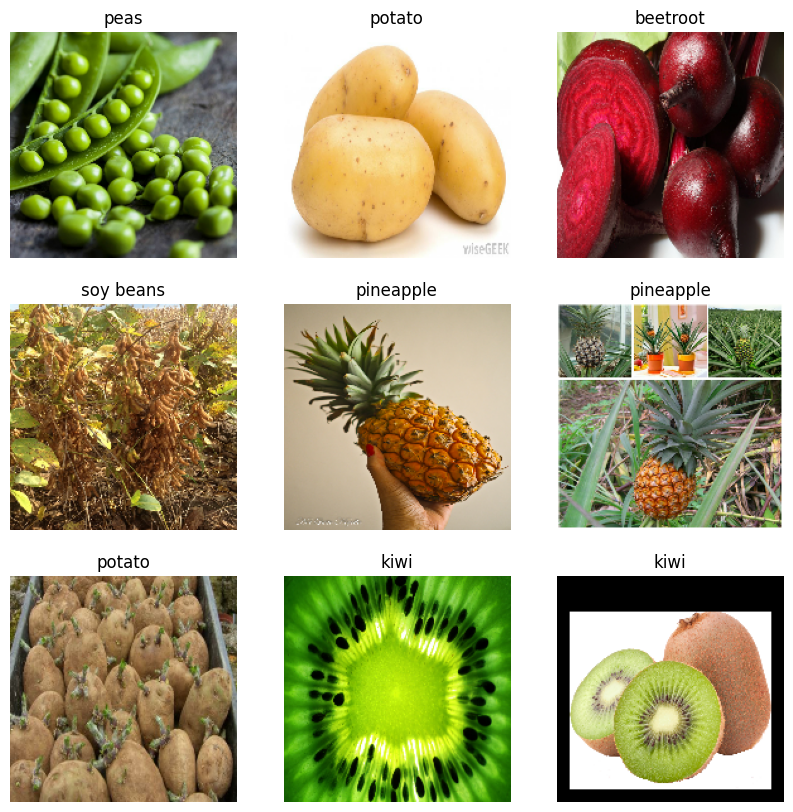

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 150s 1s/step - loss: 3.2722 - accuracy: 0.1156 - val_loss: 2.2751 - val_accuracy: 0.4274
Epoch 2/25
98/98 [==============================] - 122s 1s/step - loss: 2.3478 - accuracy: 0.3188 - val_loss: 1.4896 - val_accuracy: 0.6496
Epoch 3/25
98/98 [==============================] - 99s 945ms/step - loss: 1.6810 - accuracy: 0.5181 - val_loss: 0.8652 - val_accuracy: 0.8120
Epoch 4/25
98/98 [==============================] - 92s 893ms/step - loss: 0.9682 - accuracy: 0.7300 - val_loss: 0.6591 - val_accuracy: 0.8462
Epoch 5/25
98/98 [==============================] - 587s 6s/step - loss: 0.5403 - accuracy: 0.8536 - val_loss: 0.4441 - val_accuracy: 0.9259
Epoch 6/25
98/98 [==============================] - 87s 840ms/step - loss: 0.3265 - accuracy: 0.9210 - val_loss: 0.4305 - val_accuracy: 0.9288
Epoch 7/25
98/98 [==============================] - 88s 858ms/step - loss: 0.2256 - accuracy: 0.9448 - val_loss: 0.4558 - val_accuracy: 0.9373
Epoch

Text(0.5, 1.0, 'Loss')

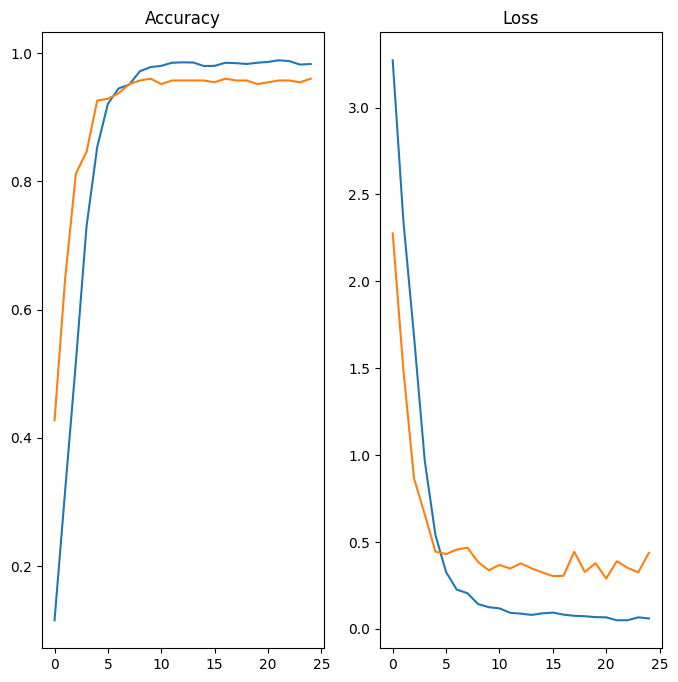

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [33]:
image = "C:/Users/sinch/Downloads/Fruits_Vegetables/Paprika.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [34]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 60ms/step


In [35]:
score = tf.nn.softmax(predict)

In [36]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is paprika with accuracy of 100.00


In [37]:
model.save('Image_classify.keras')